### Machine Learning Lab 4 - 29/07/2020 |  AAQIB AHMAD
#### Demonstrate PCA for Dimensionality Reduction on Image

#### Principal Component Analysis
PCA is a statistical procedure to convert observations of possibly correlated variables/features into ‘Principal Components’ that are –
1. Uncorrelated with/independent of each other
2. Constructed to capture maximum information/variance in the data
3. Linear combinations of the original variables

#### Using PCA for image compression
An image can be treated as a matrix - a grid of pixels, with values being the pixel intensities.
The basic steps to be followed:

1. Apply PCA on the image matrix to reduce the dimensionality to a smaller number of principal components (PCs). 
2. This is lossy compression, as we are discarding some of the information.
3. To assess how much visual information we retained, we'll reconstruct the image from the limited number of PC.
4. We'll see how good the reconstructed images are for different number of selecte components.

In [2]:
# Necessary Imports

import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

(1200, 1600, 4)


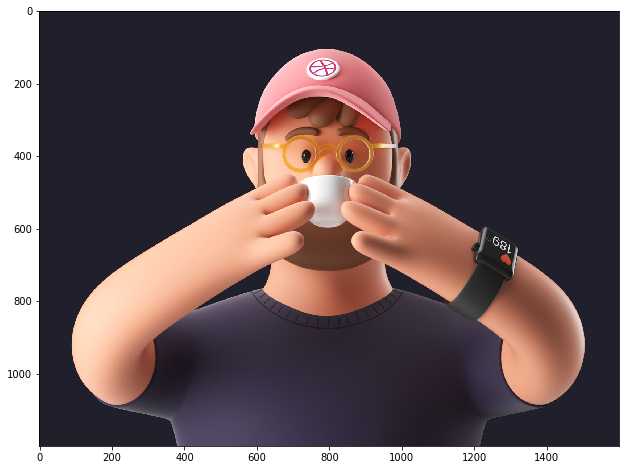

In [3]:
# Reading the Image

image_raw = imread("216.png")
print(image_raw.shape)

# Displaying the image

plt.figure(figsize=[12, 8])
plt.imshow(image_raw)

About the image -

The image is a colour image i.e. has data in 3 channels - Red, Green, Blue.
Hence the shape of the data - 1200 x 1600 x 3. It is essentially 1200 x 1600 matrix for each channel. We need to convert it to grayscale for the sake of simplicity

(1200, 1600)
1.0


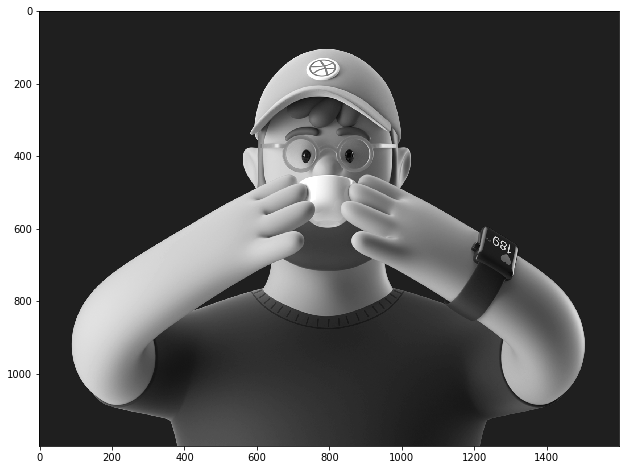

In [4]:
# To Convert the image into Grayscale

image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum / image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12, 8])
plt.imshow(image_bw, cmap=plt.cm.gray)

### Performing PCA on the image

1. We'll perform PCA on the matrix with all the components

2. We'll then look at the scree-plot to assess how many components we could retain and how much cumulative variance they capture

3. We'll pick a suitable number of components to represent the image for compression

Number of components explaining 95% Variance: 20


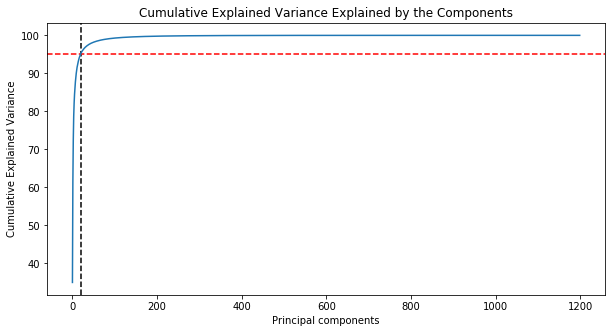

In [5]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance
# ===============================================
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

# To get to know how many PCs tell 95% of the variance?
# ===============================================
k = np.argmax(var_cumu > 95)
print("Number of components explaining 95% Variance: " + str(k))

plt.figure(figsize=[10, 5])
plt.title('Cumulative Explained Variance Explained by the Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)


# A scree plot is a line plot of the eigenvalues of factors or principal components in an analysis. 
# The scree plot is used to determine the principal components to keep in a principal component analysis (PCA).

It is found that "20" components, instead of 1200 pixels, can explain 95% of the variance in the image

We can reconstruct the image using only 20 components and see if the reconstructed image is visually very different from the original.

### Reconstructing the b/w image with the limited number of components i.e 20 -

1. We'll use the "fit_transform" of the IncrementalPCA module 
2. To first find the 20 PCs and transform and represent the data in those 20 new components/columns.
3. Next, we'll reconstruct the original matrix from these 20 components using the "inverse_transform".
4. Then plot the image to visually to check the quality of it.

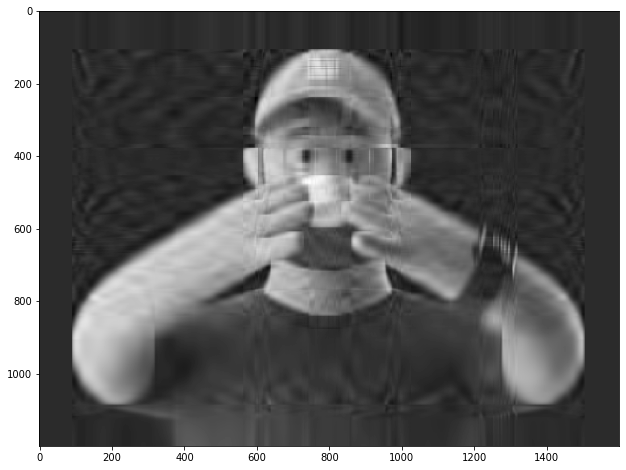

In [6]:
ipca = IncrementalPCA(n_components=k) 
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12, 8])
plt.imshow(image_recon, cmap=plt.cm.gray)

All the major details are captured but we can see the lack of clarity. Let's try out a different value of k, say k = 150 components. Function to reconstruct and plot image for a given number of components


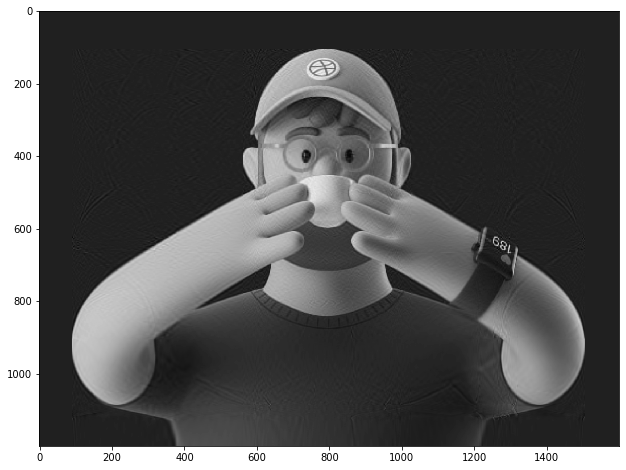

In [7]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon, cmap=plt.cm.gray)


k = 150
plt.figure(figsize=[12, 8])
plot_at_k(100)

We get better result than previous but still a bit grainy image.


### Reconstructing and plotting for different number of components
1. We'll try out different number of components, begining from 10, ending at 350
2. we'll reconstruct the image at each k and plot the images

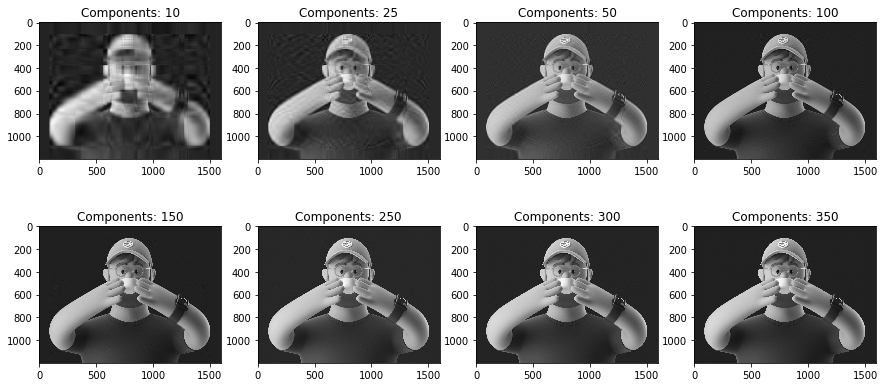

In [8]:
ks = [10, 25, 50, 100, 150, 250, 300, 350]

plt.figure(figsize=[15, 7.5])

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plot_at_k(ks[i])
    plt.title("Components: " + str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

We can see that after 150, most of the reconstructed images are indistinguishable from the original greyscale. Even 150 components instead of 1200 columns is significant compression.

Hence, the dimensionality reduction has taken place with the help of PCA

### PCA for Set Of Images

### Reading the Folder of the Image

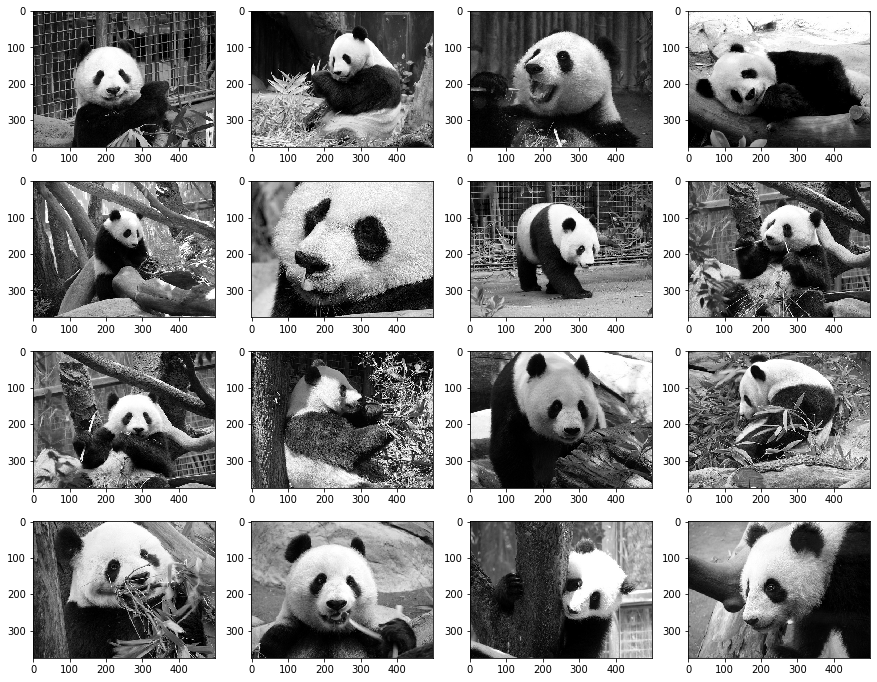

In [9]:
from glob import iglob
from PIL import Image
plt.figure(figsize=[15, 12])
i = 1
for path in iglob('C:/Users/aaqib/Aaqib - Data Science/ML_Christ_Lab/ML_LAB_04/Panda/*.jpg'
):
    img = Image.open(path).convert('LA')
    f_name = path.split('/')[-1].split('.')[0]
    img.save('C:/Users/aaqib/Aaqib - Data Science/ML_Christ_Lab/ML_LAB_04/' +f_name + '.png')
    plt.subplot(4, 4, i)
    plt.imshow(img)
    i += 1

### Reshape the Images (used to uniform the dimensions)

(375, 500)
(375, 500)
(375, 500)
(375, 500)
(375, 500)
(375, 500)
(375, 500)
(375, 500)
(375, 500)
(375, 500)
(375, 500)
(375, 500)
(375, 500)
(375, 500)
(375, 500)
(375, 500)


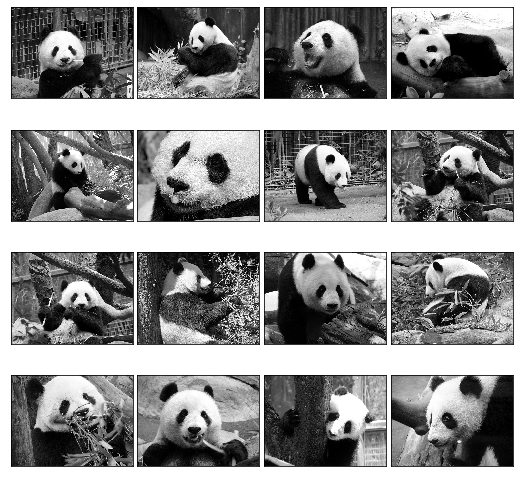

In [10]:
from glob import iglob
import pandas as pd
pics = pd.DataFrame([])
for path in iglob('C:/Users/aaqib/Aaqib - Data Science/ML_Christ_Lab/ML_LAB_04/Panda/*.png'):
    img=imread(path)
    img=img[:,:,0:3]
    img1=img.sum(axis=2)
    img = img1 /img1.max() 
    pic = pd.Series(img.flatten(),name=path)
    pics = pics.append(pic)
    print(img.shape)
     
fig, axes = plt.subplots(4,4,figsize=(9,9),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.01, wspace=0.04))
for i, ax in enumerate(axes.flat):
    ax.imshow(pics.iloc[i].values.reshape(375,500),cmap="gray")

### PCA for Set of Images

1. Cumulative Variance 
2. Finding the PCs
3. Scree Plot

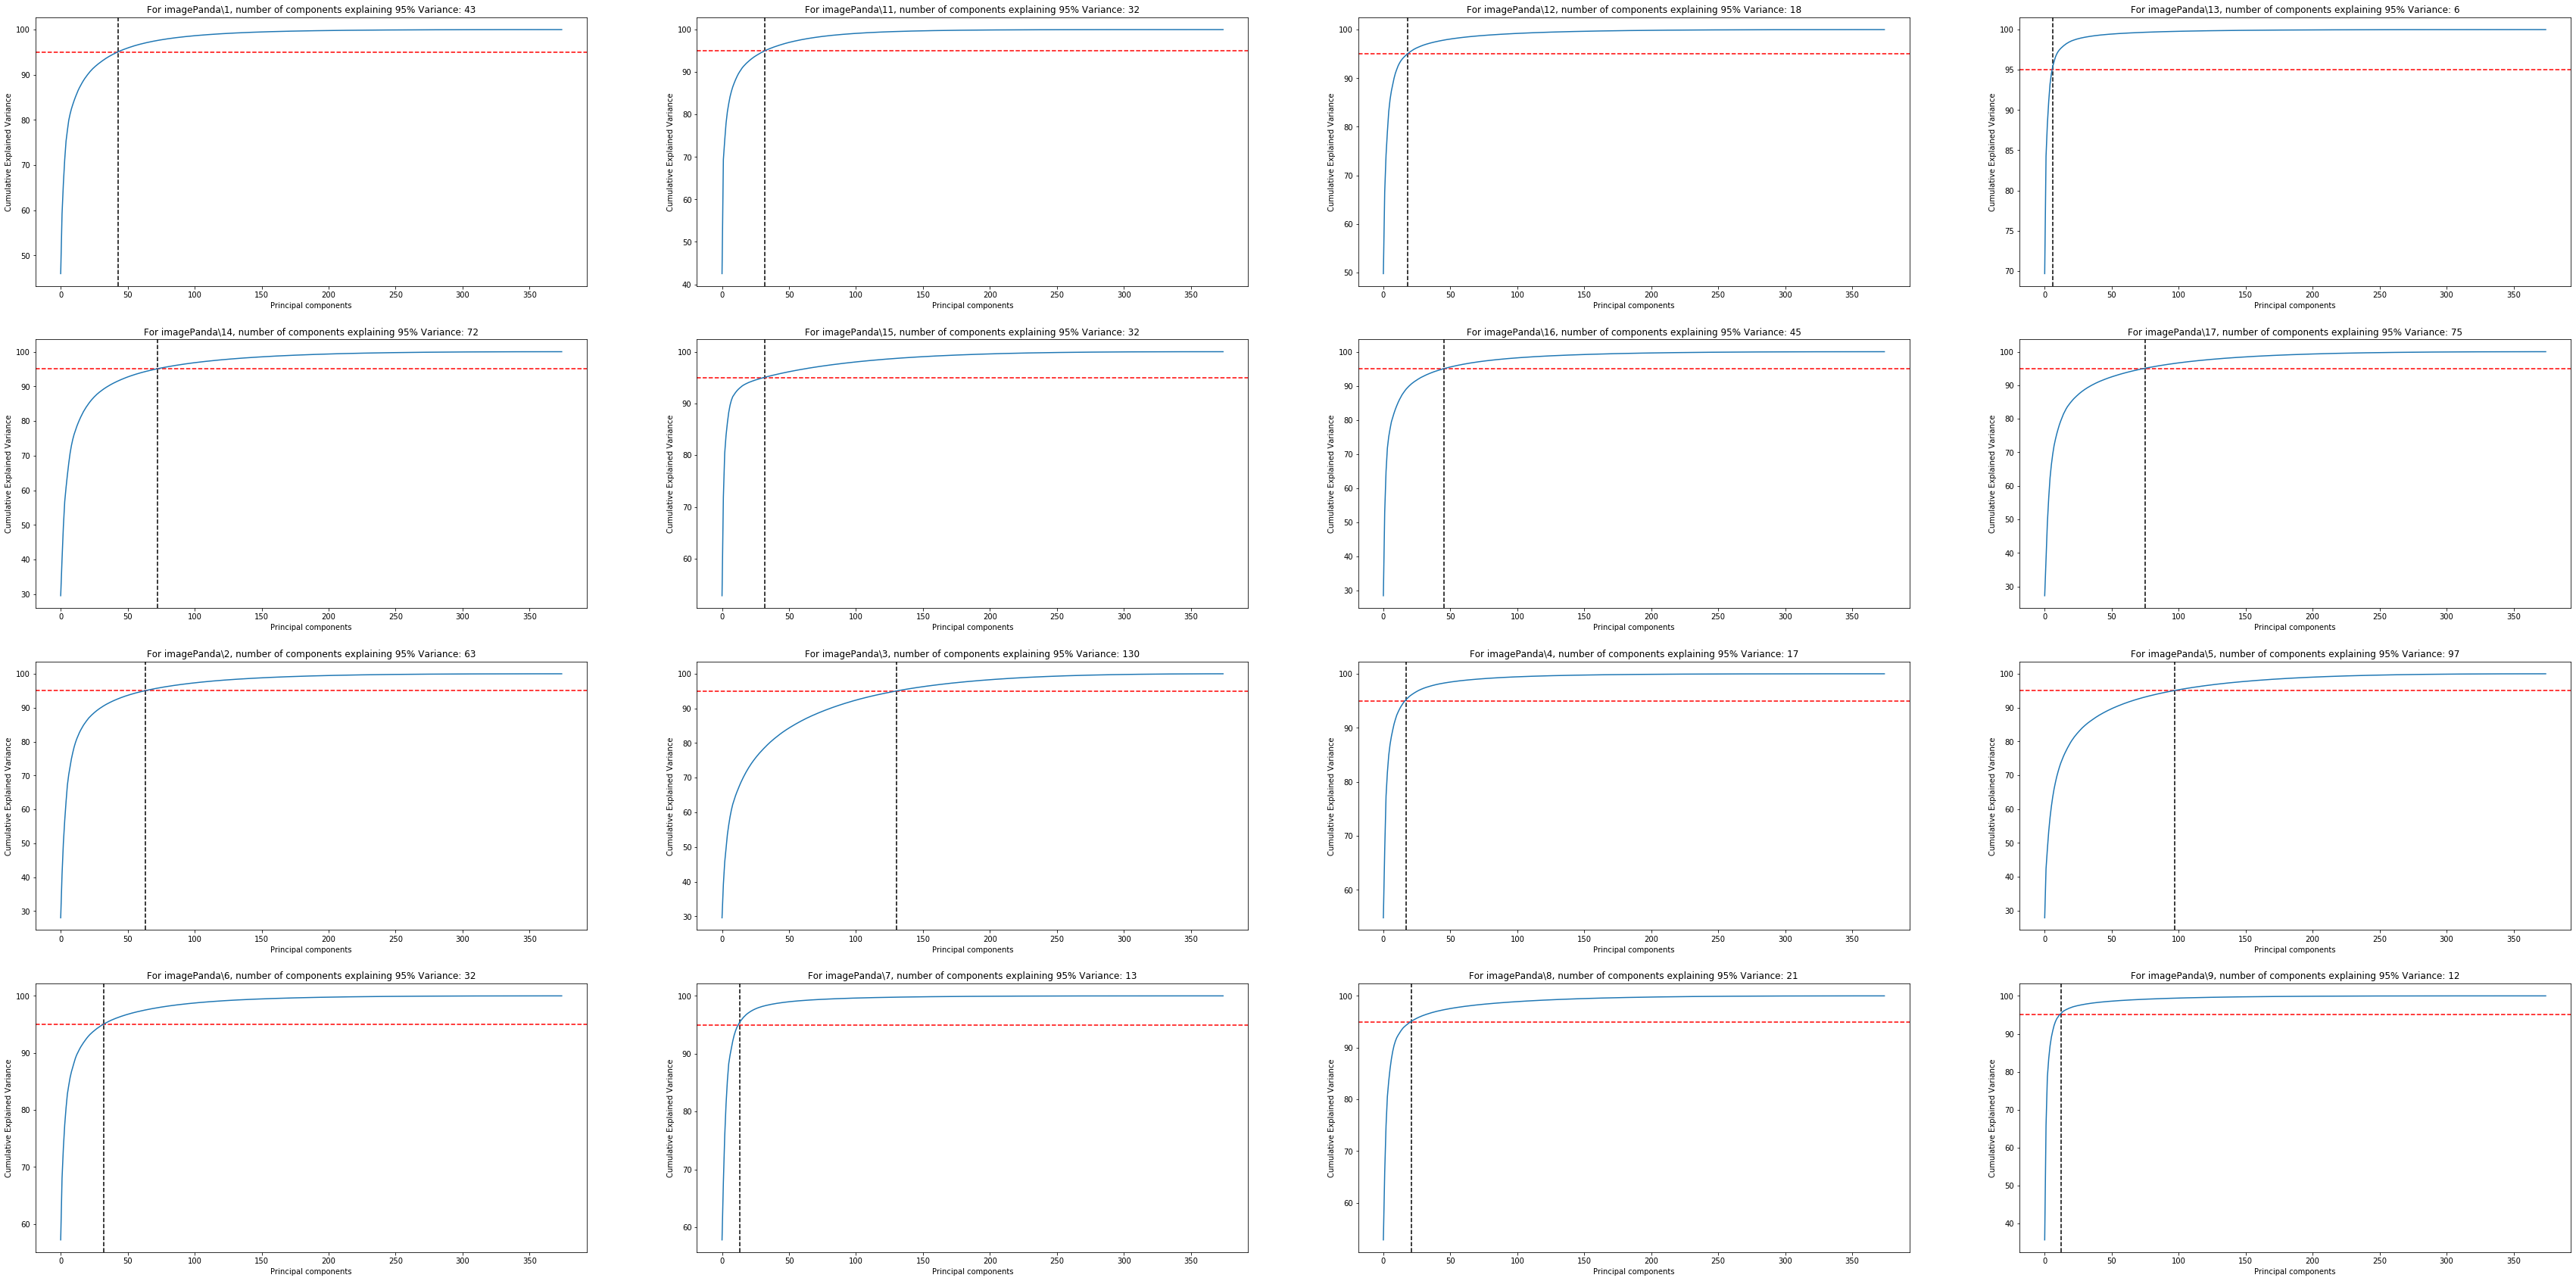

In [44]:
from sklearn.decomposition import PCA, IncrementalPCA
from glob import iglob
i=1
plt.figure(figsize=[60,30])
comps=[]

for path in iglob('C:/Users/aaqib/Aaqib - Data Science/ML_Christ_Lab/ML_LAB_04/Panda/*.png'):
    img=imread(path)
    img=img[:,:,0:3]
    img1=img.sum(axis=2)
    img = img1 /img1.max()
    f_name=path.split('/')[-1].split('.')[0]
    pca = PCA()
    pca.fit(img)

  # Getting the cumulative variance
  # ===============================================

    var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

  # How many PCs explain 95% of the variance?
  # ===============================================

    k = np.argmax(var_cumu>95)
      #print("Number of components explaining 95% Variance: "+ str(k))
    plt.subplot(4,4,i)
    plt.title("For image"+f_name+", number of components explaining 95% Variance: "+ str(k))
    plt.ylabel('Cumulative Explained Variance')
    plt.xlabel('Principal components')
    plt.axvline(x=k, color="k", linestyle="--")
    plt.axhline(y=95, color="r", linestyle="--")
    ax = plt.plot(var_cumu)
    i+=1
    comps.append(k)

Ratio of Compression:  8.4745


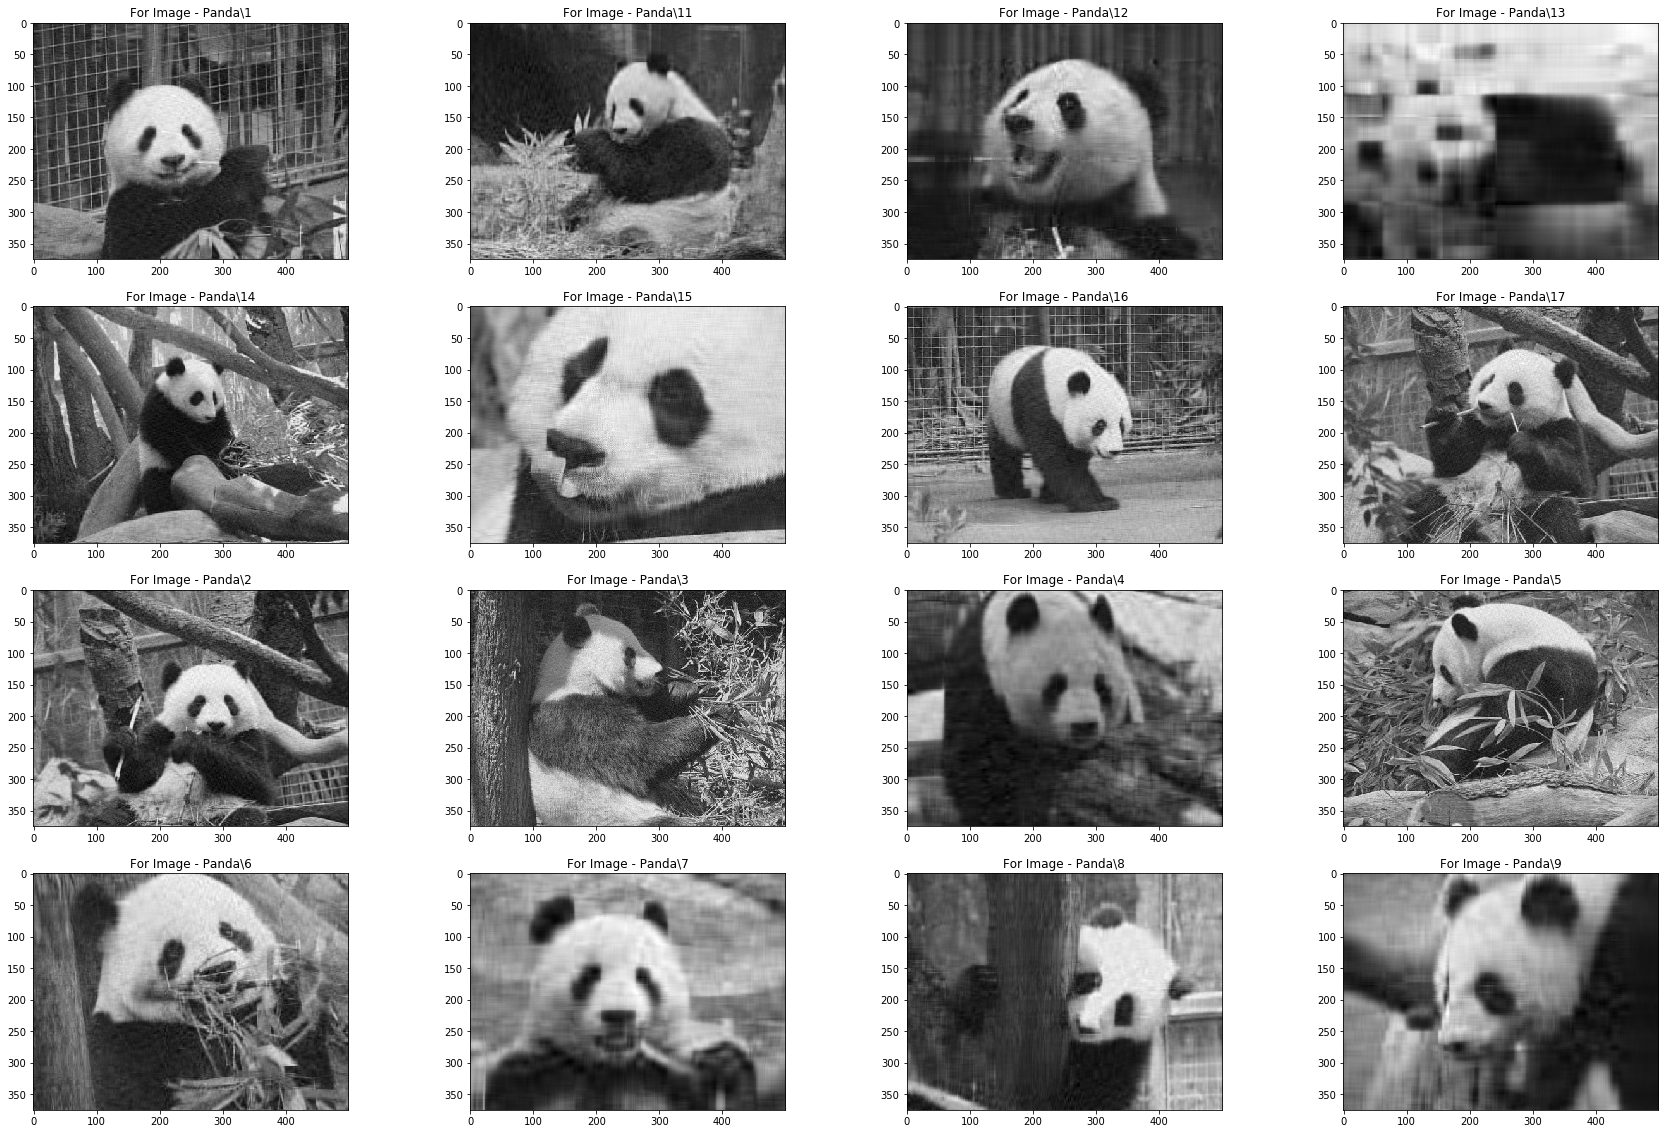

In [45]:
from sklearn.decomposition import PCA, IncrementalPCA
from glob import iglob
i=1
plt.figure(figsize=[30,20])
  
for path in iglob('C:/Users/aaqib/Aaqib - Data Science/ML_Christ_Lab/ML_LAB_04/Panda/*.png'):
    img=imread(path)
    img=img[:,:,0:3]
    img1=img.sum(axis=2)
    img = img1 /img1.max()
    f_name=path.split('/')[-1].split('.')[0]
    ipca = IncrementalPCA(n_components=comps[i-1])
    image_recon = ipca.inverse_transform(ipca.fit_transform(img))

    plt.subplot(4,4,i)
    plt.title("For Image - "+f_name)
    plt.imshow(image_recon,cmap = plt.cm.gray)
    i+=1

v_comp=sum(comps)
print("Ratio of Compression: ",str((16*375)/v_comp)[:6])

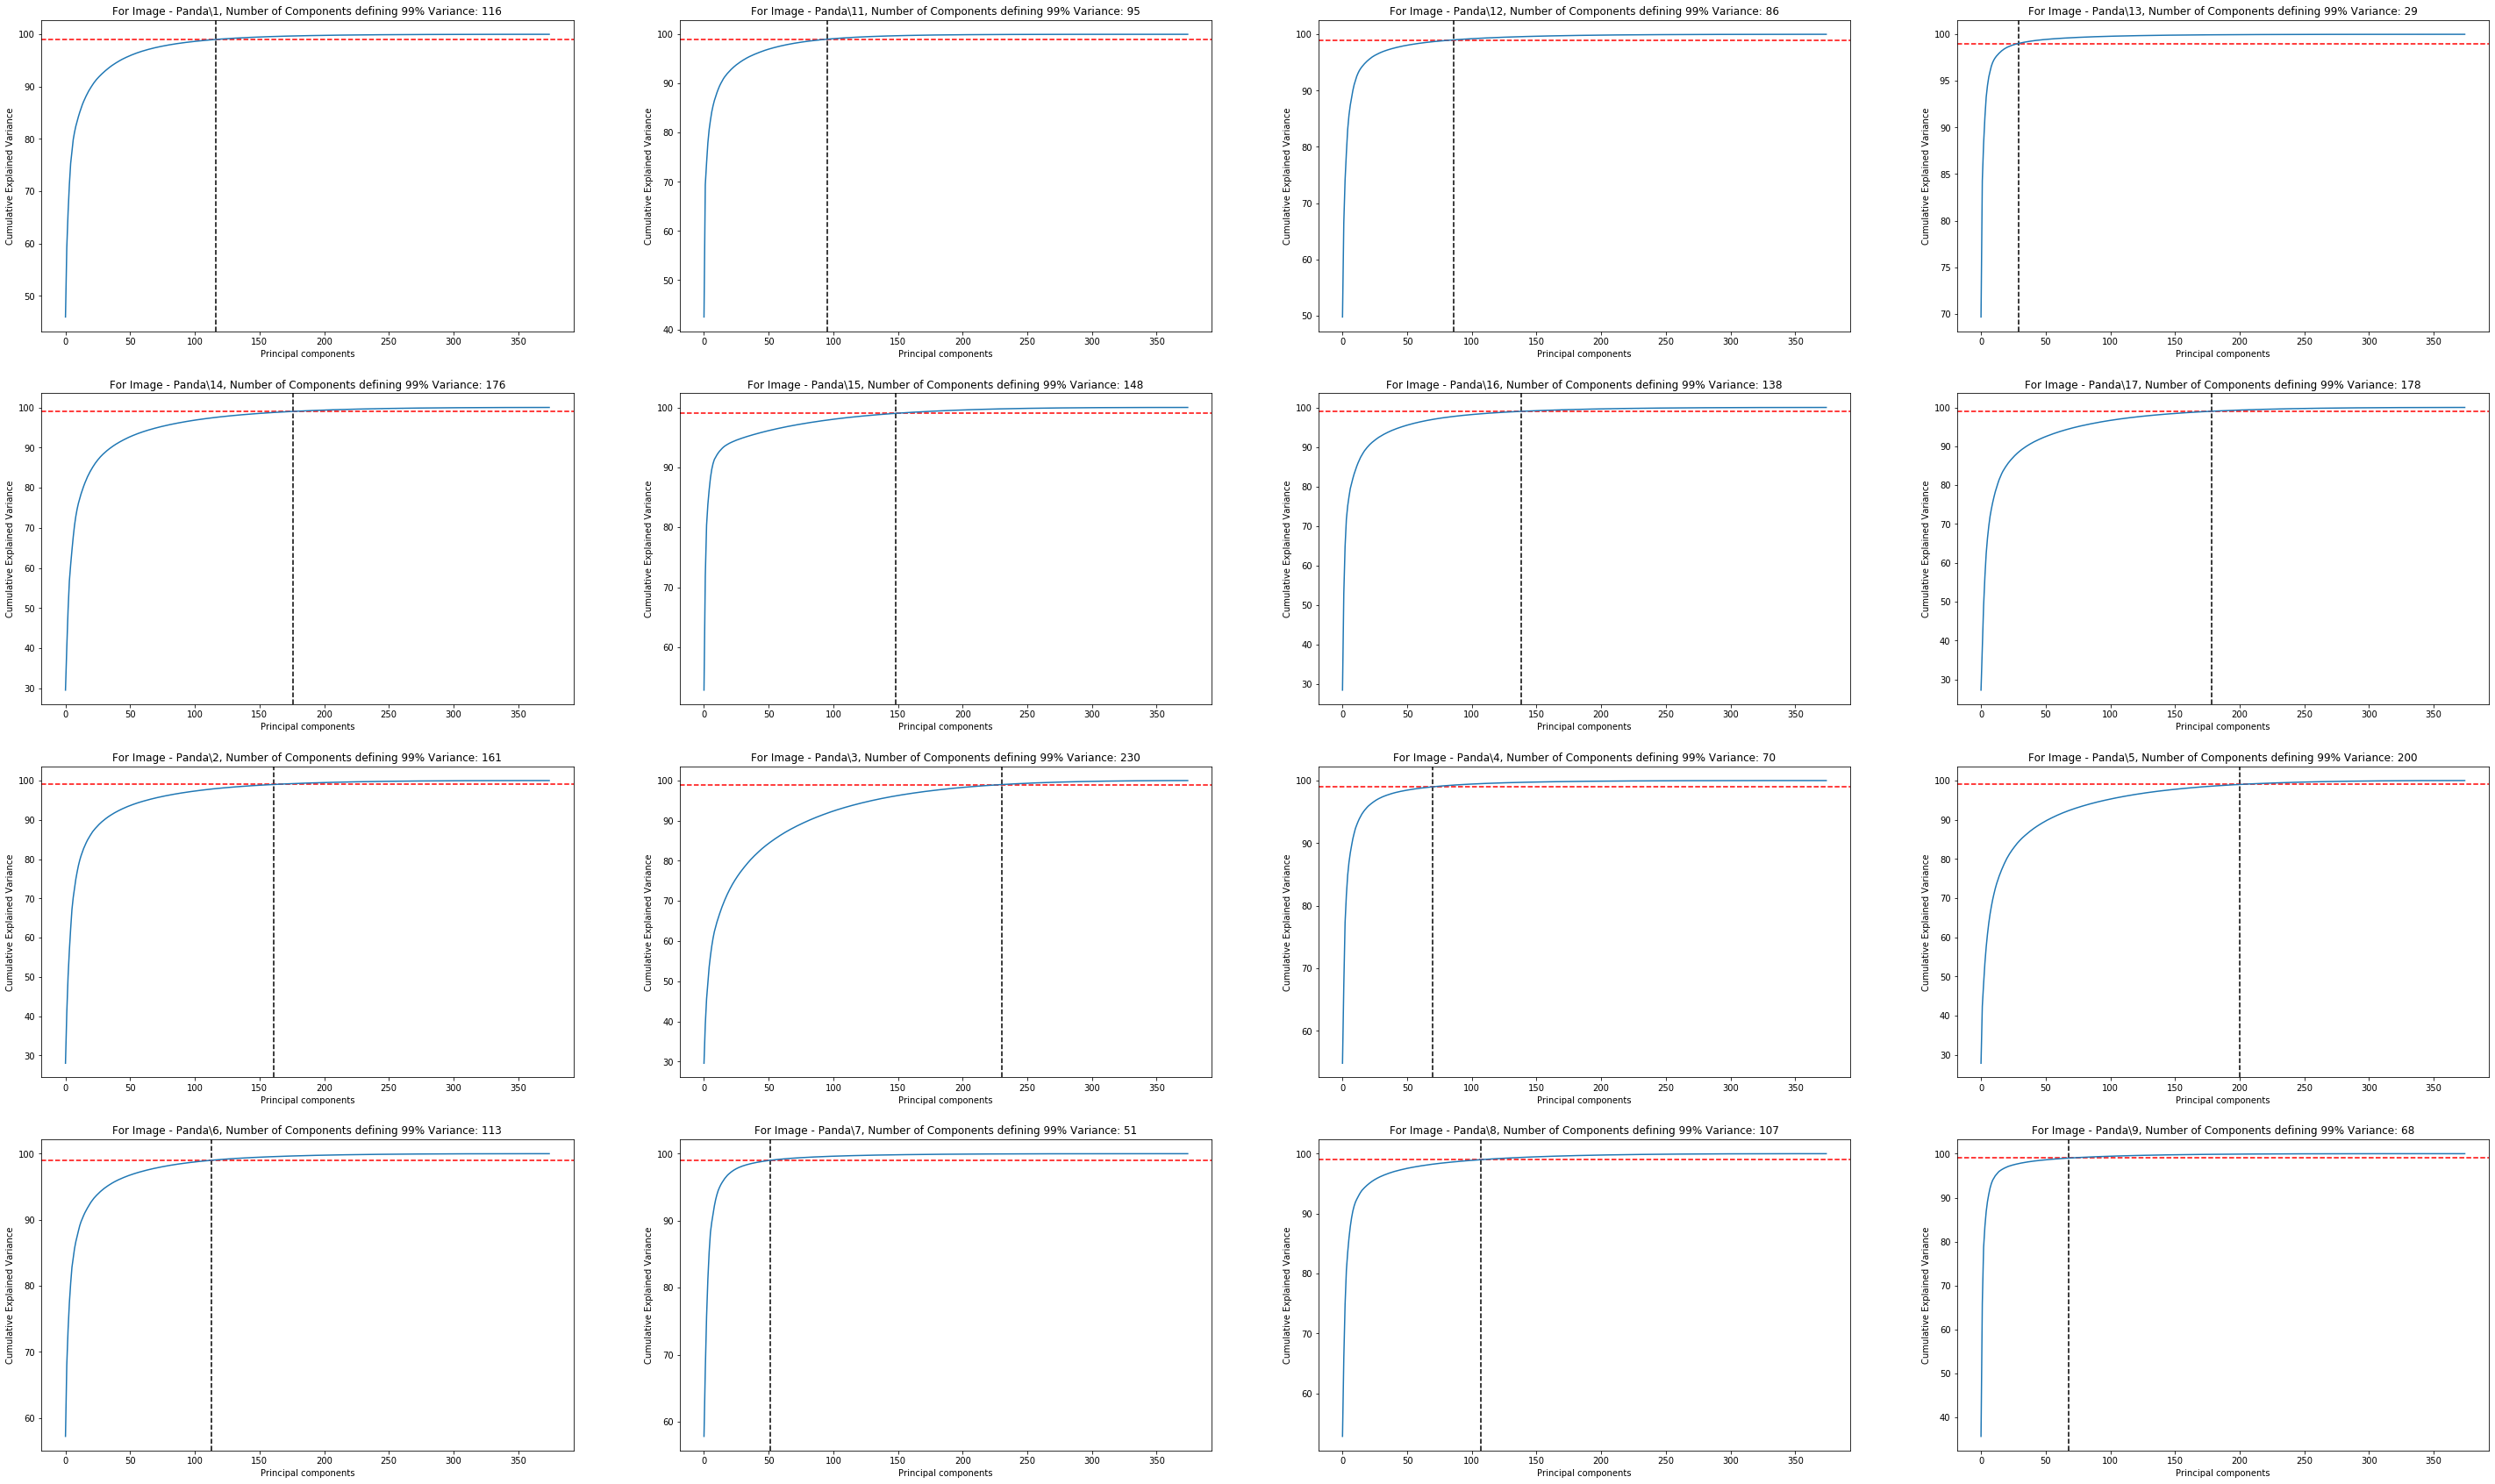

In [51]:
from sklearn.decomposition import PCA, IncrementalPCA
from glob import iglob
i=1
plt.figure(figsize=[50,30])
comps1=[]

for path in iglob('C:/Users/aaqib/Aaqib - Data Science/ML_Christ_Lab/ML_LAB_04/Panda/*.png'):
    img=imread(path)
    img=img[:,:,0:3]
    img1=img.sum(axis=2)
    img = img1 /img1.max()
    f_name=path.split('/')[-1].split('.')[0]
    pca = PCA()
    pca.fit(img)

  # Getting the cumulative variance
  # ===============================================

    var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

  # PCs explain 99% of the variance -
  # ===============================================

    k = np.argmax(var_cumu>99)
    plt.subplot(4,4,i)
    plt.title("For Image - "+f_name+", Number of Components defining 99% Variance: "+ str(k))
    plt.ylabel('Cumulative Explained Variance')
    plt.xlabel('Principal components')
    plt.axvline(x=k, color="k", linestyle="--")
    plt.axhline(y=99, color="r", linestyle="--")
    ax = plt.plot(var_cumu)
    i+=1
    comps1.append(k)

Ratio of Compression:  3.0518


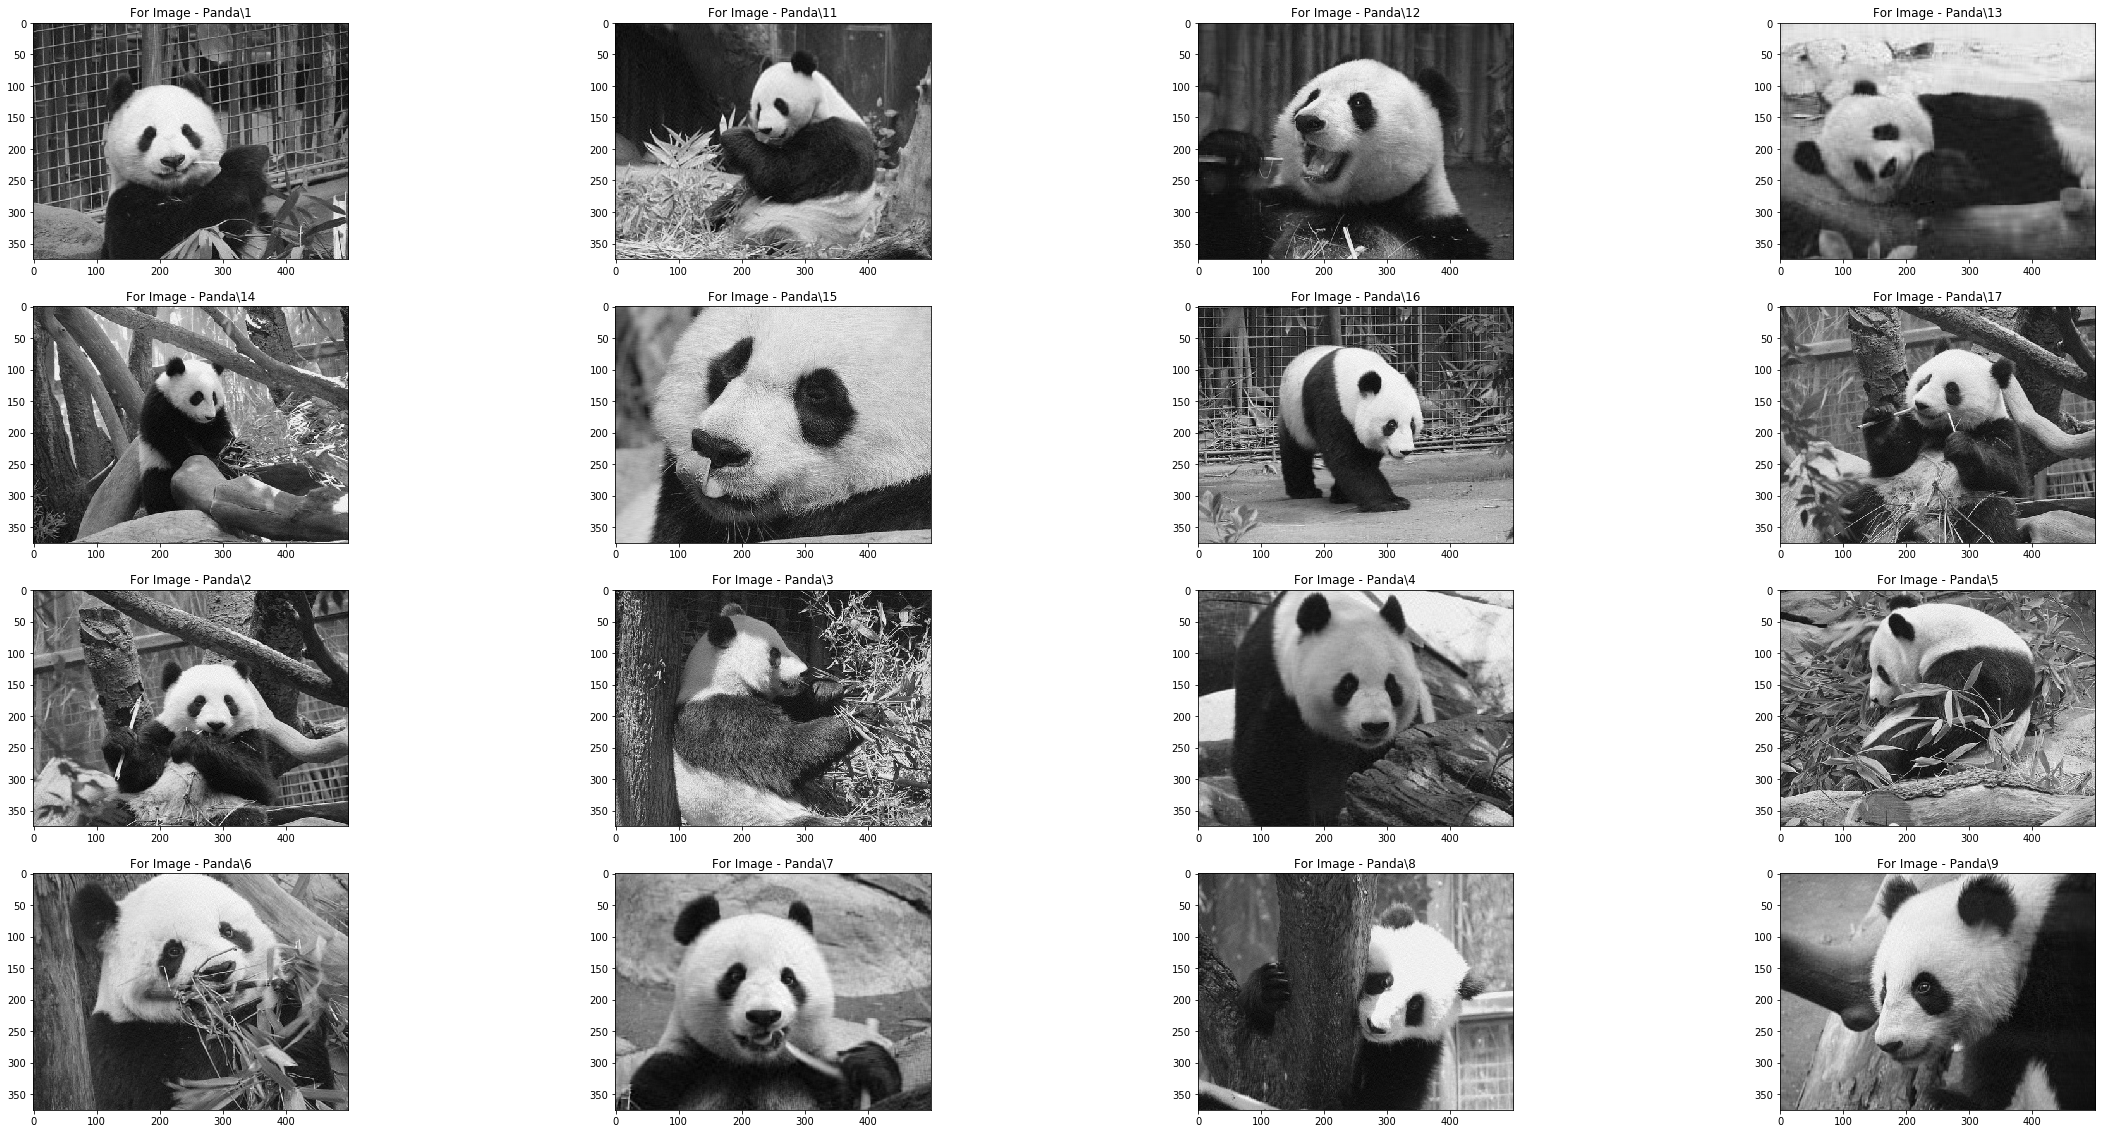

In [53]:
from sklearn.decomposition import PCA, IncrementalPCA
from glob import iglob
i=1
plt.figure(figsize=[40,20])
  
for path in iglob('C:/Users/aaqib/Aaqib - Data Science/ML_Christ_Lab/ML_LAB_04/Panda/*.png'):
    img=imread(path)
    img=img[:,:,0:3]
    img1=img.sum(axis=2)
    img = img1 /img1.max()
    f_name=path.split('/')[-1].split('.')[0]
    ipca = IncrementalPCA(n_components=comps1[i-1])
    image_recon = ipca.inverse_transform(ipca.fit_transform(img))

    plt.subplot(4,4,i)
    plt.title("For Image - "+f_name)
    plt.imshow(image_recon,cmap = plt.cm.gray)
    i+=1

v_comp1=sum(comps1)
print("Ratio of Compression: ",str((16*375)/v_comp1)[:6])

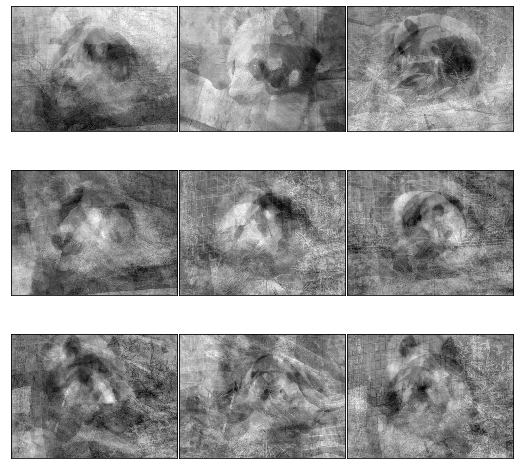

In [54]:
from sklearn.decomposition import PCA


pics_pca = PCA(n_components=.8)  #return the Eigenvectors that have the 80% of the variation in the dataset
pics_pca.fit(pics)
fig, axes = plt.subplots(3,3,figsize=(9,9),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(pics_pca.components_[i].reshape(375,500),cmap="gray")

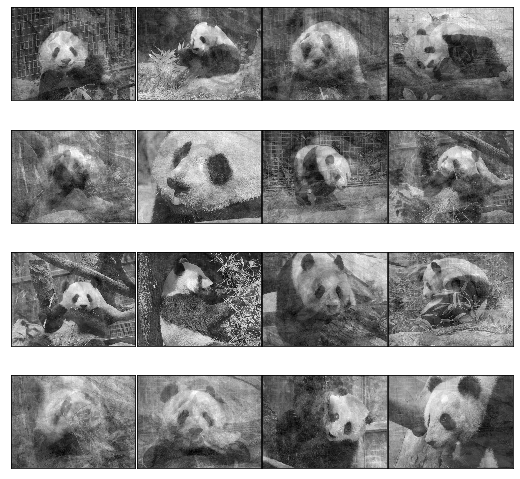

In [55]:
components = pics_pca.transform(pics)
projected  = pics_pca.inverse_transform(components)
fig, axes  = plt.subplots(4,4,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
             gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(375,500),cmap="gray")

Hence, the dimensionality reduction has taken place with the help of PCA

### Visualizing just two components :
1. Using Pokemon Dataset

In [4]:
import pandas as pd
from sklearn.decomposition import PCA

pokemon = pd.read_csv('Pokemon.csv')

In [5]:
print(pokemon.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [6]:
# Taking all Features of interest
df = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

df.describe()

HP      Attack     Defense     Sp. Atk     Sp. Def       Speed
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000

We will be reducing the features above down to just 2 principle components.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [10]:
T = pca.transform(df)
df.shape

(800, 6)

### Left with 2 principle components


In [18]:
T.shape

(800, 2)

In [27]:
T

array([[-45.86072754,  -5.38443151],
       [-11.15293667,  -5.80561951],
       [ 36.94600862,  -5.23612965],
       ...,
       [ 75.99988475, -27.27078641],
       [114.0967126 , -36.87056714],
       [ 72.88355049,  15.15261625]])

### We use the "explained_variance_ratio_" method of PCA object to see how much of the variance is explained by each of our principle components vectors.

In [21]:
pca.explained_variance_ratio_ 

array([0.46096131, 0.18752145])

So just two principle components can explain almost 65% of the variance from these 6 features.

### We can access the correlations between the components and original variables using the "components_ method" of our PCA() object.


In [22]:
components = pd.DataFrame(pca.components_, columns = df.columns, index=[1, 2])
components

HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
1  0.300808  0.492892  0.380635  0.508981  0.394370  0.327263
2  0.042210  0.076545  0.695216 -0.383311  0.173894 -0.576079

In [24]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df.columns.values)

Features by importance:
 [(143.62419952151745, 'Defense'), (119.74350606921999, 'Speed'), (105.83113958361307, 'Sp. Atk'), (76.02281561178815, 'Attack'), (68.17904342534243, 'Sp. Def'), (46.2412833592667, 'HP')]


### We see that the most significant features for this PCA are Defence, Speed, Special Attack and Attack

So for the First PC, "Attack" and "Sp. Atk" are significant, so this principle component correlates that pokemon with a high value for the first principle component will have High Attack and Sp. Atk.

For the Second PC, "Defense" and a "decrease in Speed". Pokemon with high values of the second principle component will have a high value for Defense but a low value for speed.

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

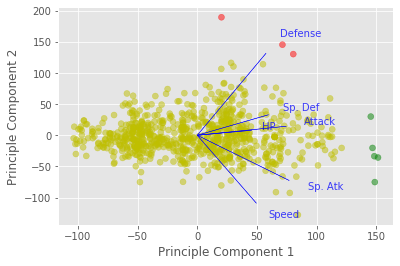

In [26]:
ax = draw_vectors(T, pca.components_, df.columns.values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 125, 'color'] = 'g'
T_df.loc[T_df['component2'] > 125, 'color'] = 'r'

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

We can see from the plot that all components are positive in the first principle component but speed and special attack in the second principle component are negative. Their lengths portray their magnitudes.

#### The pokemons in Green have high values for the first principle component – They have high Attack and Sp. Atk

#### The pokemons in Red have high values for the second principle component – They have high Defense and low Speed